In [3]:
#Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [4]:
rating_data = pd.read_csv('zomato.csv')
rating_data.shape

(51717, 17)

# Performing Exploritory Data Analysis

In [5]:
rating_data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
rating_data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [8]:
# Cheking for missing values
rating_data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [9]:
rating_data.duplicated().sum()

0

In [10]:
#Renaming some feature
rating_data.rename(columns={"rate":'Rating',"approx_cost(for two people)":"Acost_2_ppl"}, inplace=True)

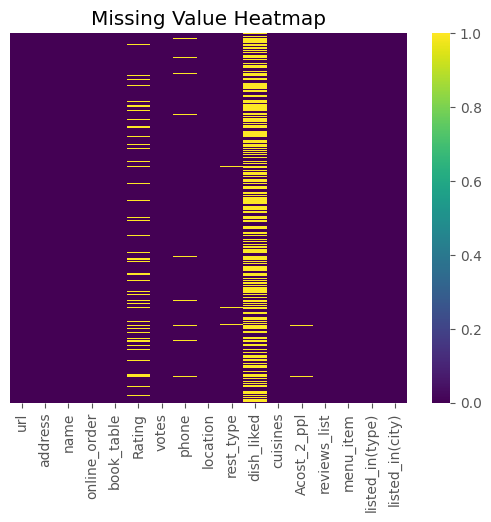

In [11]:
#Vizualizing missing values in the dataset
ax = sns.heatmap(rating_data.isnull(), yticklabels=False ,cmap="viridis")
ax.set_title("Missing Value Heatmap")
plt.show()

# Observation
- It is necessary to drop features that are not usable for model development or are missing a lot of values 
- Missing values of the target feature
- Features such as "online_order" ,"book_table" need to be encoded
- Data cleaning for selected feature is required

In [12]:
#dropping some unecessary idetifing, location and unecessary features
rating_data.drop(['url','address','name','phone','location','rest_type','dish_liked',
                  'cuisines','reviews_list','menu_item','listed_in(type)','listed_in(city)'], axis = 1, inplace=True)

In [13]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   online_order  51717 non-null  object
 1   book_table    51717 non-null  object
 2   Rating        43942 non-null  object
 3   votes         51717 non-null  int64 
 4   Acost_2_ppl   51371 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.0+ MB


# Feature Pre-processing and Data Cleaning
- One hot encoding fetures 
- Removing missing values 
- Type casting data to the correct data format

In [14]:
#Ecoding both online_odr and book_tbl 
online_odr = pd.get_dummies(rating_data["online_order"],drop_first="True",prefix="online").astype(int)
book_tbl = pd.get_dummies(rating_data["book_table"],drop_first="True",prefix="book").astype(int)

In [15]:
#Concating the encoded feature to the main dataframe
rating_data = pd.concat([rating_data,online_odr,book_tbl],axis=1)
rating_data = rating_data.drop(['online_order','book_table'],axis=1) #Dropping uncoded features at it is already replaced by coded featuers
rating_data.head()

,Rating,votes,Acost_2_ppl,online_Yes,book_Yes
0,4.1/5,775,800,1,1
1,4.1/5,787,800,1,0
2,3.8/5,918,800,1,0
3,3.7/5,88,300,0,0
4,3.8/5,166,600,0,0


In [16]:
#Cleaning Target feature (Rating)
rating_data['Rating']=rating_data["Rating"].str.replace('/5','')

#Since I only want integer values I am converting "New" and "-" as well to null values so it will be easy to type cast 
rating_data['Rating']=rating_data["Rating"].str.replace('NEW','') 
rating_data['Rating']=rating_data["Rating"].str.replace('-','')
rating_data["Rating"]=pd.to_numeric(rating_data["Rating"])
rating_data.tail()

,Rating,votes,Acost_2_ppl,online_Yes,book_Yes
51712,3.6,27,"1,500",0,0
51713,NaN,0,600,0,0
51714,NaN,0,"2,000",0,0
51715,4.3,236,"2,500",0,1
51716,3.4,13,"1,500",0,0


In [17]:
#checking actual missing values for rating
rating_data['Rating'].isnull().sum()

10052

The rows in which our target feature contains null values will be seperated into a different .csv file so that I can experiment with predicting their values using the developed models 

In [18]:
#Cleaning feature Acost_2_ppl by removing "," and changing data type
rating_data['Acost_2_ppl'] = rating_data['Acost_2_ppl'].str.replace(",","")
rating_data['Acost_2_ppl'] = pd.to_numeric(rating_data['Acost_2_ppl'])

In [19]:
#Drop null values for Acost_2_ppl feature
rating_data = rating_data.dropna(subset=['Acost_2_ppl'])

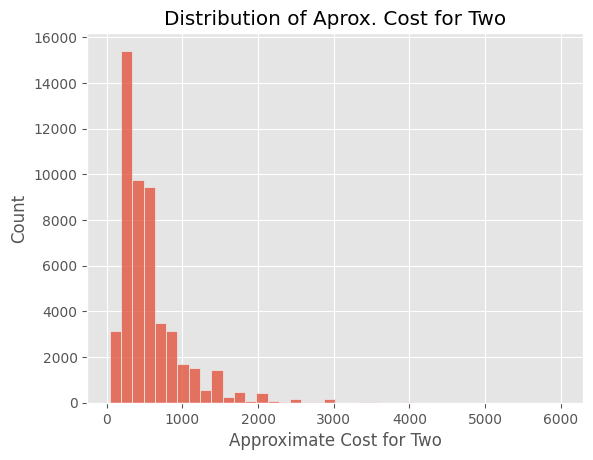

In [20]:
ax = sns.histplot(rating_data.Acost_2_ppl,bins=40)
ax.set_xlabel("Approximate Cost for Two")
ax.set_title("Distribution of Aprox. Cost for Two")
plt.show()

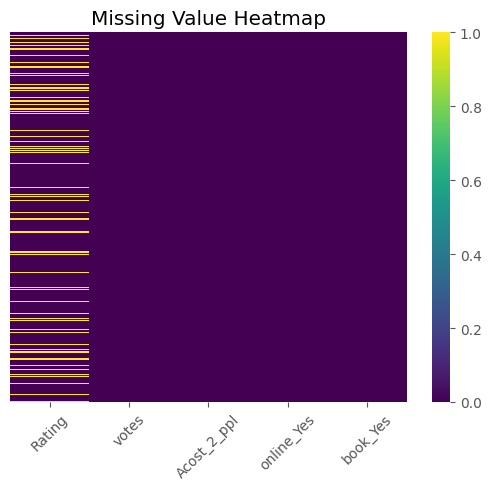

In [21]:
ax = sns.heatmap(rating_data.isnull(), yticklabels=False ,cmap="viridis")
ax.set_title("Missing Value Heatmap")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show()

In [22]:
#Seperating the data where rating feature is null so that we can use our model later to try and predict these values
clean_rating = rating_data[rating_data['Rating'].notnull()]
null_rating = rating_data[rating_data['Rating'].isnull()]

In [23]:
null_rating = null_rating.drop(columns='Rating').copy()
null_rating.head()

,votes,Acost_2_ppl,online_Yes,book_Yes
72,0,150.0,0,0
75,0,500.0,0,0
84,0,100.0,0,0
90,0,500.0,0,0
91,0,400.0,0,0


In [24]:
# Storing null_rating as .csv
null_rating.to_csv("train_null_rating_data")

In [85]:
a = clean_rating.corr()

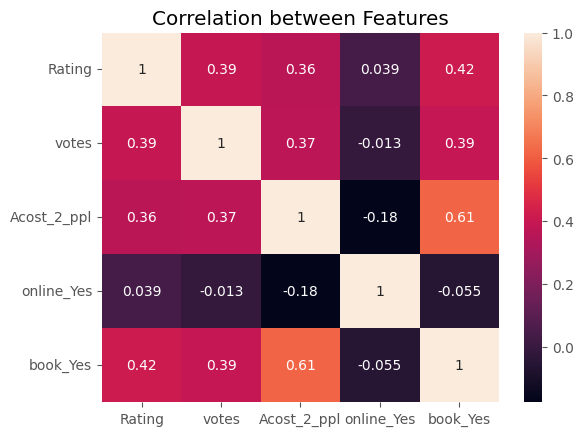

In [88]:
ax = sns.heatmap(a, annot=True)
ax.set_title("Correlation between Features")
plt.show()

We can see that our class distribution is imbalanced in our dataset 

In [27]:
# Note that here we are diving Rating into 4 different clases class 1 to 4 
# 1 = 1.0 - 1.9
# 2 = 2.0 - 2.9
# 3 = 3.0 - 3.9
# 4 = 4.0 - 4.9 
clean_rating['Rating'] = clean_rating['Rating'].astype(int)
clean_rating.head()

/tmp/ipykernel_54108/1594475616.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_rating['Rating'] = clean_rating['Rating'].astype(int)


,Rating,votes,Acost_2_ppl,online_Yes,book_Yes
0,4,775,800.0,1,1
1,4,787,800.0,1,0
2,3,918,800.0,1,0
3,3,88,300.0,0,0
4,3,166,600.0,0,0


In [28]:
# Type casting target feature as category so that models can be developed to predict these 4 classes
clean_rating.loc[:, "Rating"] = pd.Categorical(clean_rating['Rating'])
clean_rating.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41418 entries, 0 to 51716
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Rating       41418 non-null  category
 1   votes        41418 non-null  int64   
 2   Acost_2_ppl  41418 non-null  float64 
 3   online_Yes   41418 non-null  int64   
 4   book_Yes     41418 non-null  int64   
dtypes: category(1), float64(1), int64(3)
memory usage: 1.6 MB


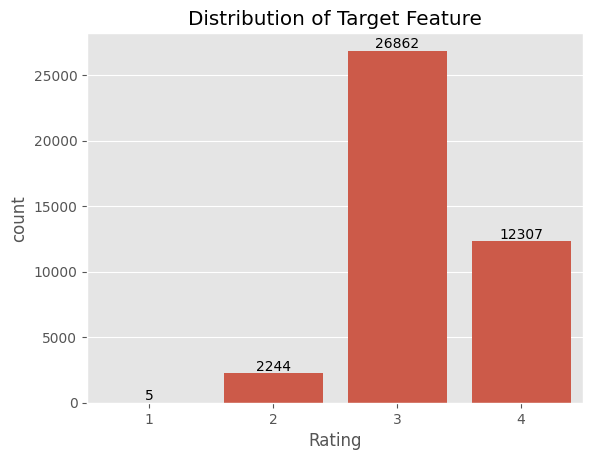

In [29]:
# Target Feature Distribution (note that this particular feature has been processed into 4 different class) 
ax = sns.countplot(clean_rating,x="Rating")
for i in ax.containers:
    ax.bar_label(i)
ax.set_title("Distribution of Target Feature")
plt.show()

# Traning our Classification models
- Logistic Regression
- Random Forest 
- K-Neighbour

In [30]:
clean_rating.columns

Index(['Rating', 'votes', 'Acost_2_ppl', 'online_Yes', 'book_Yes'], dtype='object')

In [31]:
x = clean_rating[['votes', 'Acost_2_ppl', 'online_Yes', 'book_Yes']]
y = clean_rating['Rating']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.30, stratify=y, random_state=101)

# Logistical Regression

In [55]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()

In [56]:
lr_model.fit(x_train,y_train)

/home/rohan/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [57]:
lr_prediction = lr_model.predict(x_test)

In [58]:
from sklearn.metrics import confusion_matrix

In [59]:
lr_cfm = confusion_matrix(y_test,lr_prediction)
print(lr_cfm)

[[   0    0    2    0]
 [   0    0  640   33]
 [   0    0 7623  436]
 [   0    0 1634 2058]]


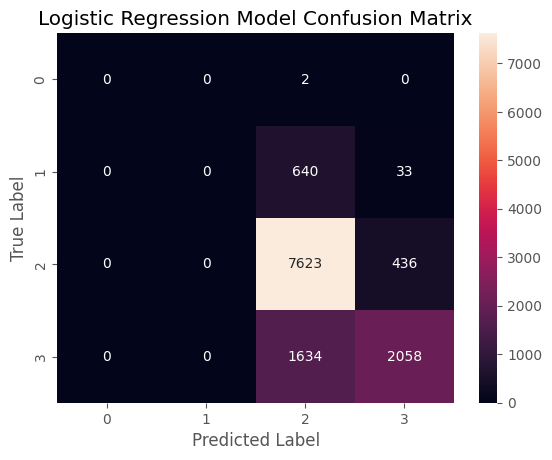

In [83]:
ax = sns.heatmap(lr_cfm,annot= True, fmt='d')
ax.set_title("Logistic Regression Model Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

In [37]:
from sklearn.metrics import classification_report

In [228]:
print(classification_report(y_test,lr_prediction))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00       673
           3       0.77      0.95      0.85      8059
           4       0.81      0.56      0.66      3692

    accuracy                           0.78     12426
   macro avg       0.40      0.38      0.38     12426
weighted avg       0.74      0.78      0.75     12426



/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Decision Tree Model

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()

In [48]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
dt_prediction = dt_model.predict(x_test)

In [50]:
df_cfm = confusion_matrix(y_test,dt_prediction)
print(df_cfm)

[[   2    0    0    0]
 [   0  308  331   34]
 [   0  148 7600  311]
 [   0   33  528 3131]]


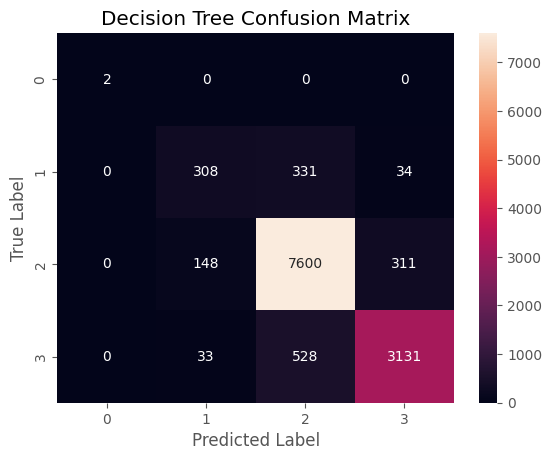

In [82]:
ax = sns.heatmap(df_cfm,annot= True, fmt='d')
ax.set_title("Decision Tree Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

In [52]:
print(classification_report(y_test,dt_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.63      0.46      0.53       673
           3       0.90      0.94      0.92      8059
           4       0.90      0.85      0.87      3692

    accuracy                           0.89     12426
   macro avg       0.86      0.81      0.83     12426
weighted avg       0.88      0.89      0.89     12426



# Pycaret

In [240]:
from pycaret.classification import *
s = setup(clean_rating, target='Rating', session_id=123)

,Description,Value
0,Session id,123
1,Target,Rating
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2, 4: 3"
4,Original data shape,"(41418, 5)"
5,Transformed data shape,"(41418, 5)"
6,Transformed train set shape,"(28992, 5)"
7,Transformed test set shape,"(12426, 5)"
8,Numeric features,4
9,Preprocess,True


In [241]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:58:07
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8910,0.2857,0.8910,0.8870,0.8877,0.7703,0.7716,0.6760
dt,Decision Tree Classifier,0.8857,0.2769,0.8857,0.8833,0.8836,0.7597,0.7612,0.0460
knn,K Neighbors Classifier,0.8488,0.2773,0.8488,0.8432,0.8449,0.6809,0.6824,0.0990
gbc,Gradient Boosting Classifier,0.7962,0.0000,0.7962,0.7720,0.7703,0.5374,0.5508,2.9260
lr,Logistic Regression,0.7815,0.0000,0.7815,0.7452,0.7496,0.4822,0.5140,2.9030
nb,Naive Bayes,0.7663,0.2258,0.7663,0.7257,0.7353,0.4513,0.4760,0.0430
ridge,Ridge Classifier,0.7514,0.0000,0.7514,0.7186,0.7128,0.3952,0.4380,0.0390
lda,Linear Discriminant Analysis,0.7498,0.0000,0.7498,0.7191,0.7120,0.3933,0.4352,0.0440
svm,SVM - Linear Kernel,0.7490,0.0000,0.7490,0.7333,0.7319,0.4583,0.4753,0.4680
ada,Ada Boost Classifier,0.4527,0.0000,0.4527,0.6693,0.4712,0.2003,0.2281,0.4220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# Random Forest Classifier (Best fit)

In [1]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()

In [33]:
rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [34]:
rf_prediction = rf_model.predict(x_test) 

In [74]:
rf_cfm = confusion_matrix(y_test,rf_prediction)
print(rf_cfm)

[[   2    0    0    0]
 [   0  302  336   35]
 [   0  119 7608  332]
 [   0   25  464 3203]]


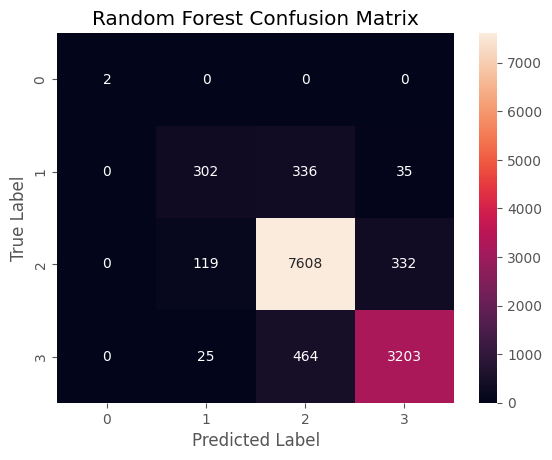

In [97]:
ax = sns.heatmap(rf_cfm,annot= True, fmt='d')
ax.set_title("Random Forest Confusion Matrix")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
plt.show()

In [54]:
print(classification_report(y_test,rf_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.68      0.45      0.54       673
           3       0.90      0.94      0.92      8059
           4       0.90      0.87      0.88      3692

    accuracy                           0.89     12426
   macro avg       0.87      0.82      0.84     12426
weighted avg       0.89      0.89      0.89     12426



# K Neighbors Classifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()

In [62]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier()

In [63]:
knn_prediction = knn_model.predict(x_test)

In [66]:
knn_cfm = confusion_matrix(y_test,knn_prediction)
knn_cfm

array([[   2,    0,    0,    0],
       [   0,  241,  381,   51],
       [   0,  163, 7412,  484],
       [   0,   51,  700, 2941]])

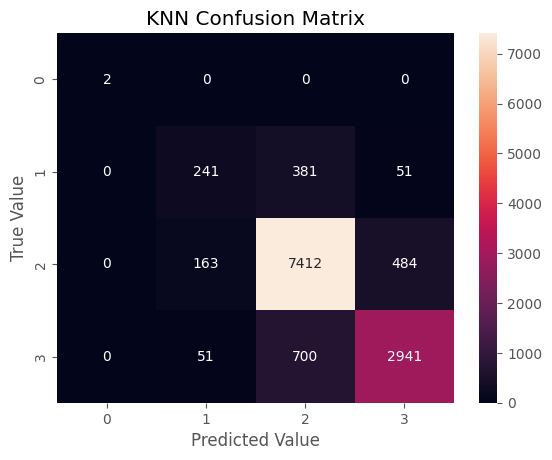

In [80]:
ax = sns.heatmap(knn_cfm, annot = True, fmt = "d")
ax.set_title("KNN Confusion Matrix")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("True Value")
plt.show()

In [95]:
print(classification_report(y_test,knn_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.53      0.36      0.43       673
           3       0.87      0.92      0.90      8059
           4       0.85      0.80      0.82      3692

    accuracy                           0.85     12426
   macro avg       0.81      0.77      0.79     12426
weighted avg       0.85      0.85      0.85     12426



# CatBoost

In [89]:
from catboost import CatBoostClassifier
cb_model = CatBoostClassifier()

In [90]:
cb_model.fit(x_train,y_train)

Learning rate set to 0.093951
0:	learn: 1.2298959	total: 66.9ms	remaining: 1m 6s
1:	learn: 1.1157936	total: 85.4ms	remaining: 42.6s
2:	learn: 1.0270452	total: 99ms	remaining: 32.9s
3:	learn: 0.9592144	total: 112ms	remaining: 28s
4:	learn: 0.9006862	total: 125ms	remaining: 24.8s
5:	learn: 0.8526453	total: 135ms	remaining: 22.4s
6:	learn: 0.8118112	total: 151ms	remaining: 21.4s
7:	learn: 0.7769212	total: 160ms	remaining: 19.8s
8:	learn: 0.7475538	total: 170ms	remaining: 18.8s
9:	learn: 0.7217154	total: 184ms	remaining: 18.2s
10:	learn: 0.6998203	total: 195ms	remaining: 17.6s
11:	learn: 0.6803894	total: 207ms	remaining: 17s
12:	learn: 0.6632096	total: 223ms	remaining: 16.9s
13:	learn: 0.6477379	total: 250ms	remaining: 17.6s
14:	learn: 0.6341213	total: 270ms	remaining: 17.7s
15:	learn: 0.6223067	total: 287ms	remaining: 17.6s
16:	learn: 0.6122319	total: 301ms	remaining: 17.4s
17:	learn: 0.6028281	total: 317ms	remaining: 17.3s
18:	learn: 0.5944493	total: 336ms	remaining: 17.3s
19:	learn: 0.5

In [91]:
cb_prediction = cb_model.predict(x_test)

In [92]:
cb_cfm = confusion_matrix(y_test,cb_prediction)
cb_cfm

array([[   2,    0,    0,    0],
       [   0,   60,  562,   51],
       [   0,    3, 7580,  476],
       [   0,    6,  903, 2783]])

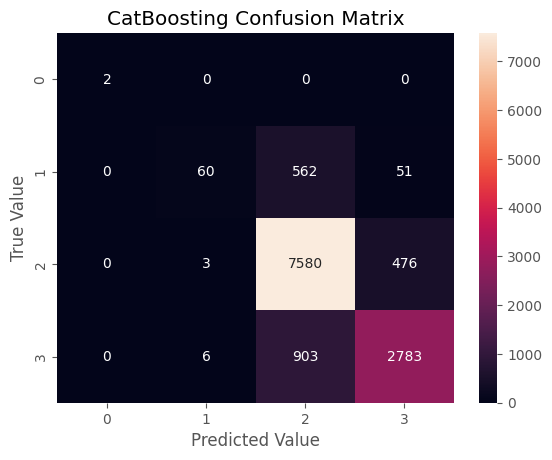

In [94]:
ax = sns.heatmap(cb_cfm, annot = True, fmt = "d")
ax.set_title("CatBoosting Confusion Matrix")
ax.set_xlabel("Predicted Value")
ax.set_ylabel("True Value")
plt.show()

In [96]:
print(classification_report(y_test,cb_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.87      0.09      0.16       673
           3       0.84      0.94      0.89      8059
           4       0.84      0.75      0.79      3692

    accuracy                           0.84     12426
   macro avg       0.89      0.70      0.71     12426
weighted avg       0.84      0.84      0.82     12426



# Using Stacking Technique

In [100]:
from mlxtend.classifier import StackingClassifier

In [128]:
stk_cls = StackingClassifier(classifiers=[dt_model,rf_model,knn_model],
                             meta_classifier=rf_model)

In [129]:
stk_cls.fit(x_train,y_train)

StackingClassifier(classifiers=[DecisionTreeClassifier(),
                                RandomForestClassifier(),
                                KNeighborsClassifier()],
                   meta_classifier=RandomForestClassifier())

In [130]:
stk_prediction = stk_cls.predict(x_test)

In [131]:
stk_cfm = confusion_matrix(y_test,stk_prediction)
print(stk_cfm)

[[   2    0    0    0]
 [   0  301  335   37]
 [   0  123 7622  314]
 [   0   29  525 3138]]


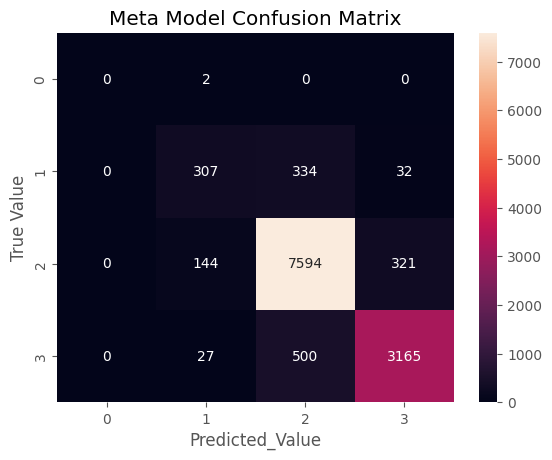

In [105]:
ax = sns.heatmap(stk_cfm, annot=True, fmt='d')
ax.set_title("Meta Model Confusion Matrix")
ax.set_xlabel("Predicted_Value")
ax.set_ylabel("True Value")
plt.show()

In [132]:
print(classification_report(y_test,stk_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.66      0.45      0.53       673
           3       0.90      0.95      0.92      8059
           4       0.90      0.85      0.87      3692

    accuracy                           0.89     12426
   macro avg       0.87      0.81      0.83     12426
weighted avg       0.89      0.89      0.89     12426



In [127]:
print(classification_report(y_test,stk_prediction))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       0.63      0.46      0.53       673
           3       0.90      0.94      0.92      8059
           4       0.90      0.85      0.87      3692

    accuracy                           0.89     12426
   macro avg       0.86      0.81      0.83     12426
weighted avg       0.88      0.89      0.88     12426



In [107]:
print(classification_report(y_test,stk_prediction))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         2
           2       0.64      0.46      0.53       673
           3       0.90      0.94      0.92      8059
           4       0.90      0.86      0.88      3692

    accuracy                           0.89     12426
   macro avg       0.61      0.56      0.58     12426
weighted avg       0.89      0.89      0.89     12426



/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/rohan/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
